In [4]:
from baseline_model import baseline_bicubic
from data_sets_loaders import get_train_val_test_dataloaders
import matplotlib.pyplot as plt
import torch
import numpy as np
from loss_functions import CombinedLoss
from discriminator_model import DiscriminatorModel

cropped_dir = "./cropped_images"
train_dl, val_dl, test_dl = get_train_val_test_dataloaders(100)

total_loss = 0
loss_fn = CombinedLoss(0.0, 1.0, 1.0, 1.0, 4.0)
outputs = []
discriminator = DiscriminatorModel(3, 8, 0.3)

# Loop
for lr_batch, hr_batch in test_dl:
	for i, image_arr in enumerate(lr_batch):
		output = baseline_bicubic(image_arr)
		outputs.append(output)
		loss = loss_fn(output, hr_batch[i], discriminator(output) * 0)
		total_loss += loss
	
print("Loss: " + str(total_loss / len(outputs)))

print("Example Result")
fig = plt.figure()
plt.subplots_adjust(bottom=0.000001)
for lr_batch, hr_batch in test_dl:
	for image_arr in hr_batch:
		fig.add_subplot(2, 2, 1) 
		plt.imshow(np.transpose(image_arr))
		plt.axis('off')
		plt.title("Original High Resolution") 
		fig.add_subplot(2, 2, 2) 
		plt.imshow(np.transpose(outputs))
		plt.axis('off')
		plt.title("Generated High Resolution") 
		fig.add_subplot(2, 2, 3) 
		plt.imshow(np.transpose(lr_batch[i]))
		plt.axis('off')
		plt.title("Original Low Resolution") 
		break
	break
plt.show()


TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)


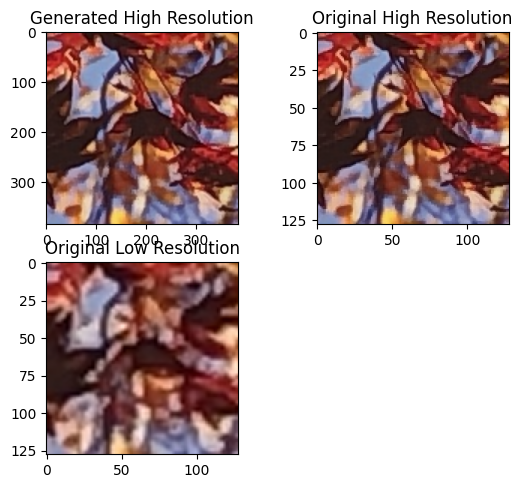

In [41]:
# TEST CODE
import PIL
from PIL import Image
import numpy as np
train_dl, val_dl, test_dl = get_train_val_test_dataloaders(100)
fig = plt.figure()
plt.subplots_adjust(bottom=0.000001)

for lr_batch, hr_batch in test_dl:
	for i, image in enumerate(hr_batch):
		img = Image.fromarray(np.uint8(np.transpose(image, (2,1,0)) * 255))
		detected_width = image.shape[2]
		detected_height = image.shape[1]
		new_img = img.resize((detected_width * 3,detected_height * 3), Image.BICUBIC)
		fig.add_subplot(2, 2, 1) 
		plt.imshow(np.transpose(np.transpose(np.array(new_img) / 255.0, (2,1,0))))
		plt.title("Generated High Resolution") 
		fig.add_subplot(2, 2, 2) 

		plt.imshow(np.transpose(hr_batch[i]))
		plt.title("Original High Resolution") 
		fig.add_subplot(2, 2, 3) 

		plt.imshow(np.transpose(lr_batch[i]))
		plt.title("Original Low Resolution") 
		break
	break
plt.show()